# CNN practice

1. simple CNN
2. deep CNN
3. ?
4. ?
5. ensemble
6. low memory

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from mnist import MNIST

2023-07-03 14:57:51.770855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 14:57:51.919790: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 14:57:52.588461: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda/extras/CUPTI/:/usr/local/cuda-11.7/lib64:/u

# Load Image

In [2]:
mndata = MNIST('../data/mnist/')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

train_images = np.array(train_images).reshape((-1, 28, 28, 1))
train_labels = np.array(train_labels)
test_images = np.array(test_images).reshape((-1, 28, 28, 1))
test_labels = np.array(test_labels)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

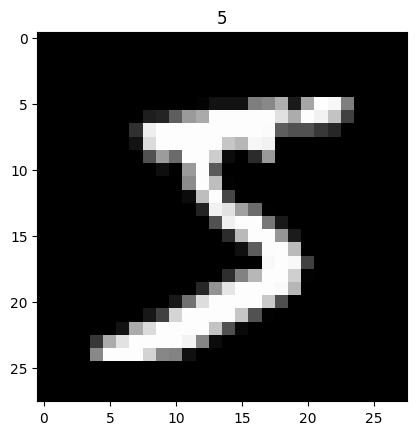

In [3]:
idx = 0

plt.title(train_labels[0])
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [4]:
train_labels_1hot = tf.one_hot(train_labels, 10)
test_labels_1hot = tf.one_hot(test_labels, 10)

train_labels_1hot.shape, test_labels_1hot.shape

2023-07-03 14:57:58.337019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 14:57:58.337296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 14:57:58.371595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 14:57:58.371888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 14:57:58.372080: I tensorflow/compiler/xla/stream_executo

(TensorShape([60000, 10]), TensorShape([10000, 10]))

# batches

In [5]:
batch_size = 100

train_batch_images = np.array([train_images[idx: idx+100] for idx in range(train_images.shape[0]//batch_size)])
train_batch_labels = np.array([train_labels_1hot[idx: idx+100] for idx in range(train_images.shape[0]//batch_size)])
test_batch_images = np.array([test_images[idx: idx+100] for idx in range(test_images.shape[0]//batch_size)])
test_batch_labels = np.array([test_labels_1hot[idx: idx+100] for idx in range(test_images.shape[0]//batch_size)])


train_batch_images.shape, train_batch_labels.shape, test_batch_images.shape, test_batch_labels.shape

((600, 100, 28, 28, 1), (600, 100, 10), (100, 100, 28, 28, 1), (100, 100, 10))

# Simple CNN

5 layers (last FC-10)

In [6]:
# class SimpleCNN():
#     def __init__(self):
#         pass

#     def stack_layers(self):
#         l1_output, w1 = self.conv_block(x, 32, dropout_rate, 'conv1')
#         # print("l1 output shape: ", l1_output.shape)
#         l2_output, w2 = conv_block(l1_output, 64, dropout_rate, 'conv2')
#         # print("l2 output shape: ", l2_output.shape)
#         l3_output, w3 = conv_block(l2_output, 128, dropout_rate, 'conv3')
#         # print("l3 output shape: ", l3_output.shape)

#         # fc layers
#         flatten = tf.reshape(l3_output, (x.shape[0], -1))
#         # print("flatten output shape: ", flatten.shape)
#         l4_output, w4 = fc_layer(flatten, 4096)
#         # print("l4 output shape: ", l4_output.shape)
#         l5_output, w5 = fc_layer(l4_output, 4096)
#         # print("l5 output shape: ", l5_output.shape)
#         l6_output, w6 = last_layer(l5_output, 10)

#     def conv_block(self, x, filter_nums, dropout_rate, name, weights=None):
#     if weights:
#         print(weights)
#         filters = weights
#     else:
#         filters = tf.Variable(tf.random.normal([3, 3, 1, filter_nums]))
#     conv_output = tf.nn.conv2d(x, filters, (1,1,1,1), 'SAME', name=name)
#     relu_output = tf.nn.relu(conv_output)
#     pool_output = tf.nn.max_pool2d(
#         relu_output, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
#     block_output = tf.nn.dropout(pool_output, rate=dropout_rate)
#     return block_output, filters

# def fc_layer(self, x, units, weights=None):
#     if weights:
#         w, b = weights
#     else:
#         w = tf.Variable(tf.random.normal((x.shape[-1], units)))
#         b = tf.Variable(tf.random.normal((units, )))
#     fc_output = tf.nn.relu(tf.matmul(x, w)+b)
#     return fc_output, [w, b]

# def last_layer(self, x, classes, weights=None):
#     if weights:
#         w, b = weights
#     else:
#         w = tf.Variable(tf.random.normal((x.shape[-1], classes)))
#         b = tf.Variable(tf.random.normal((classes, )))
#     logits = tf.matmul(x, w)+b
#     return logits, [w, b]#tf.nn.softmax(logits)

In [7]:
# class SimpleCNN(tf.keras.Model):
#     def __init__(self, dropout_rate):
#         super(SimpleCNN, self).__init__()
#         self.dropout_rate = dropout_rate

#         # layers
#         self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')
#         self.pool1 = tf.keras.layers.MaxPool2D((2, 2), padding='SAME')
#         self.dropout1 = tf.keras.layers.Dropout(rate=self.dropout_rate)

#         self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='SAME')
#         self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='SAME')

#         self.flatten = tf.keras.layers.Flatten()
#         self.d1 = tf.keras.layers.Dense(4096, activation='relu')
#         self.d2 = tf.keras.layers.Dense(10, activation='softmax')
        
#     def call(self, x):
#         x = self.conv1(x)
#         x = self.pool1(x)
#         x = self.dropout1(x)

#         x = self.conv2(x)
#         x = self.pool1(x)
#         x = self.dropout1(x)

#         x = self.conv3(x)
#         x = self.pool1(x)
#         x = self.dropout1(x)

#         x = self.flatten(x)
#         x = self.d1(x)
#         x = self.d1(x)

#         x = self.d2(x)
#         return x


In [8]:
dropout_rate = 0.01
# SimpleCNN(dropout_rate)

In [9]:
def conv_block(x, filter_nums, dropout_rate, name, weights=None):
    if isinstance(weights, np.ndarray):
        filters = weights
    else:
        filters = tf.Variable(tf.random.normal([3, 3, 1, filter_nums]))
    conv_output = tf.nn.conv2d(x, filters, (1,1,1,1), 'SAME', name=name)
    relu_output = tf.nn.relu(conv_output)
    pool_output = tf.nn.max_pool2d(
        relu_output, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
    block_output = tf.nn.dropout(pool_output, rate=dropout_rate)
    return block_output, filters

def fc_layer(x, units, weights=None):
    # if weights:
        # w, b = weights
    # else:
    if not isinstance(weights, np.ndarray):
        weights = tf.Variable(tf.random.normal((x.shape[-1], units)))
        # b = tf.Variable(tf.random.normal((units, )))
    fc_output = tf.nn.relu(tf.matmul(x, weights))#+b)
    return fc_output, weights#[w, b]

def last_layer(x, classes, weights=None):
    # if weights:
    #     w, b = weights
    # else:
    if not isinstance(weights, np.ndarray):
        weights = tf.Variable(tf.random.normal((x.shape[-1], classes)))
        # b = tf.Variable(tf.random.normal((classes, )))
    logits = tf.matmul(x, weights)#+b
    return logits, weights#[w, b]#tf.nn.softmax(logits)
    

def model(x, dropout_rate, weights=None):
    if not weights:
        # convolution blocks
        l1_output, w1 = conv_block(x, 32, dropout_rate, 'conv1')
        # print("l1 output shape: ", l1_output.shape)
        l2_output, w2 = conv_block(l1_output, 64, dropout_rate, 'conv2')
        # print("l2 output shape: ", l2_output.shape)
        l3_output, w3 = conv_block(l2_output, 128, dropout_rate, 'conv3')
        # print("l3 output shape: ", l3_output.shape)

        # fc layers
        flatten = tf.reshape(l3_output, (x.shape[0], -1))
        # print("flatten output shape: ", flatten.shape)
        l4_output, w4 = fc_layer(flatten, 4096)
        # print("l4 output shape: ", l4_output.shape)
        l5_output, w5 = fc_layer(l4_output, 4096)
        # print("l5 output shape: ", l5_output.shape)
        l6_output, w6 = last_layer(l5_output, 10)
    else:
        # convolution blocks
        l1_output, w1 = conv_block(x, 32, dropout_rate, 'conv1', weights=weights[0])
        # print("l1 output shape: ", l1_output.shape)
        l2_output, w2 = conv_block(l1_output, 64, dropout_rate, 'conv2', weights=weights[1])
        # print("l2 output shape: ", l2_output.shape)
        l3_output, w3 = conv_block(l2_output, 128, dropout_rate, 'conv3', weights=weights[2])
        # print("l3 output shape: ", l3_output.shape)

        # fc layers
        flatten = tf.reshape(l3_output, (x.shape[0], -1))
        # print("flatten output shape: ", flatten.shape)
        l4_output, w4 = fc_layer(flatten, 4096, weights=weights[3])
        # print("l4 output shape: ", l4_output.shape)
        l5_output, w5 = fc_layer(l4_output, 4096, weights=weights[4])
        # print("l5 output shape: ", l5_output.shape)
        l6_output, w6 = last_layer(l5_output, 10, weights=weights[5])

    weights = [w1, w2, w3, w4, w5, w6]
    return l6_output, weights
    

In [17]:
weights = [
    tf.Variable(tf.random.normal([3, 3, 1, 32])),
    tf.Variable(tf.random.normal([3, 3, 32, 64])),
    tf.Variable(tf.random.normal([3, 3, 64, 128])),
    tf.Variable(tf.random.normal((2048, 4096))),
    tf.Variable(tf.random.normal((4096, 4096))),
    tf.Variable(tf.random.normal((16777216, 10))),
]
    

def model(x, dropout_rate, weights):

    # convolution blocks
    l1_output, w1 = conv_block(x, 32, dropout_rate, 'conv1', weights=weights[0])
    print("l1 output shape: ", l1_output.shape)
    l2_output, w2 = conv_block(l1_output, 64, dropout_rate, 'conv2', weights=weights[1])
    print("l2 output shape: ", l2_output.shape)
    l3_output, w3 = conv_block(l2_output, 128, dropout_rate, 'conv3', weights=weights[2])
    print("l3 output shape: ", l3_output.shape)

    # fc layers
    flatten = tf.reshape(l3_output, (x.shape[0], -1))
    print("flatten output shape: ", flatten.shape)
    l4_output, w4 = fc_layer(flatten, 4096, weights=weights[3])
    print("l4 output shape: ", l4_output.shape)
    l5_output, w5 = fc_layer(l4_output, 4096, weights=weights[4])
    print("l5 output shape: ", l5_output.shape)
    l6_output, w6 = last_layer(l5_output, 10, weights=weights[5])
    print("l6 output shape: ", l6_output.shape)

    return l6_output

In [18]:
model(test_images, 0.01, weights)

l1 output shape:  (10000, 14, 14, 32)
l2 output shape:  (10000, 7, 7, 64)
l3 output shape:  (10000, 4, 4, 128)
flatten output shape:  (10000, 2048)
l4 output shape:  (10000, 4096)
l5 output shape:  (10000, 4096)
l6 output shape:  (10000, 10)


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[-6.5424128e+07, -8.4711440e+07, -3.4729464e+07, ...,
         4.3908692e+07,  7.9222400e+07, -5.7026248e+07],
       [-1.2718055e+08,  9.2449800e+07,  3.8009336e+07, ...,
        -6.3827200e+05,  3.7152492e+07, -2.1108564e+07],
       [-7.5003160e+07, -7.6753328e+07, -1.3477851e+08, ...,
         1.0408584e+07,  7.1463592e+07,  3.8940800e+05],
       ...,
       [-1.8872368e+07, -1.7453936e+07,  8.3614520e+07, ...,
         3.5351208e+07, -3.7263020e+06, -5.2631384e+07],
       [-9.9962224e+07, -5.0924164e+07,  3.4496696e+07, ...,
        -9.3001280e+06,  3.1400262e+07,  8.2252336e+07],
       [-3.6061036e+07, -3.6497040e+06,  3.9922460e+07, ...,
        -2.8455808e+07,  2.8780164e+07,  1.2107393e+08]], dtype=float32)>

In [19]:
# output, weights = model(test_images, 0.01)

In [20]:
learning_rate = 0.0001
sgd = tf.keras.optimizers.SGD(learning_rate)

In [21]:
# mymodel = SimpleCNN(dropout_rate)
# mymodel.summary()

In [22]:
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# optimizer = tf.keras.optimizers.Adam()

In [23]:
epochs = 5

for i in range(epochs):

    for b, (batch_images, batch_labels) in enumerate(zip(train_batch_images, train_batch_labels)):
        with tf.GradientTape() as tape:
            # if len(weights):
            #     pred, _ = model(batch_images, 0.01, weights)
            pred = model(batch_images, 0.01, weights)
            # else:
            #     pred, weights = model(batch_images, 0.01)
            loss = tf.nn.softmax_cross_entropy_with_logits(batch_labels, pred)
        sgd.minimize(loss, var_list=weights, tape=tape)
        print(f"epoch: {i}, batches: {b}, loss: {tf.reduce_sum(loss)}")

l1 output shape:  (100, 14, 14, 32)
l2 output shape:  (100, 7, 7, 64)
l3 output shape:  (100, 4, 4, 128)
flatten output shape:  (100, 2048)
l4 output shape:  (100, 4096)
l5 output shape:  (100, 4096)
l6 output shape:  (100, 10)


ValueError: No gradients provided for any variable: (['Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-4.46374357e-01, -4.57058966e-01, -2.86359459e-01,
           4.46623683e-01,  2.99263954e-01, -4.78893638e-01,
          -2.83502012e-01, -7.18055785e-01, -2.98658347e+00,
          -1.08817637e-01,  7.48511493e-01, -1.14748311e+00,
          -1.96982607e-01,  4.65005577e-01, -1.67358494e+00,
          -2.26929235e+00,  3.15762490e-01, -9.49713409e-01,
          -4.81016427e-01,  1.20072436e+00, -4.20764208e-01,
           1.11314619e+00,  1.33051443e+00, -1.67879358e-01,
           4.28146094e-01,  6.10830724e-01, -8.67114604e-01,
           5.98382294e-01,  1.69573331e+00, -8.14088166e-01,
          -1.97542533e-01,  2.17293239e+00]],

        [[-1.02044475e+00, -9.89765823e-01, -1.14343905e+00,
          -7.44643569e-01,  3.39721352e-01,  7.52491117e-01,
          -7.82482445e-01,  1.10035908e+00,  9.75798905e-01,
          -5.99294901e-01, -6.09506369e-01,  9.75454152e-02,
          -5.37510542e-03, -7.30174959e-01, -1.25461566e+00,
          -1.22158892e-01, -6.98209345e-01,  3.99319410e-01,
          -9.11409974e-01,  9.19651151e-01, -3.33198532e-02,
           2.65116274e-01, -1.76061058e+00, -1.43641040e-01,
           3.29883963e-01,  4.83391821e-01, -1.13998912e-01,
           1.23605454e+00,  4.76044379e-02, -1.00405836e+00,
           9.95380044e-01,  2.06563517e-01]],

        [[-2.51540281e-02,  1.02151617e-01, -1.95787883e+00,
           4.03535873e-01, -5.41930199e-01,  3.30893040e-01,
           2.94419497e-01,  1.55750656e+00, -1.46861577e+00,
          -7.77053595e-01, -2.32788146e-01,  2.58847564e-01,
          -3.54052454e-01,  1.29159653e+00,  4.41014975e-01,
          -3.18432003e-01, -1.85193026e+00, -1.44543471e-02,
          -4.49677557e-01,  9.49026108e-01, -1.34294522e+00,
           6.47508979e-01, -1.02256715e+00, -4.59131837e-01,
           4.60736573e-01,  9.26914275e-01, -6.84469640e-01,
           2.93858618e-01,  2.99307793e-01, -7.03691006e-01,
          -2.51844525e+00, -5.26520312e-01]]],


       [[[ 1.30579281e+00,  1.01817441e+00,  1.51665330e-01,
           3.63568753e-01,  2.63712794e-01, -1.34926274e-01,
          -7.69452751e-01,  9.63407993e-01, -1.20501792e+00,
           1.98265266e+00,  6.74444586e-02, -5.56971226e-03,
           5.72734177e-01, -3.42248797e-01, -1.44733489e-03,
           5.65562733e-02,  1.05346000e+00,  1.18501341e+00,
          -4.95853692e-01, -1.91169095e+00, -2.37743661e-01,
          -5.70372045e-01,  8.77448916e-01, -1.13035375e-02,
           1.43206573e+00, -1.18012047e+00, -5.14664352e-02,
           4.35669115e-03,  8.48125398e-01,  9.42740619e-01,
          -2.14213967e-01, -1.07443237e+00]],

        [[ 8.65586400e-01, -7.92875700e-03,  5.56516349e-01,
           3.80583376e-01, -1.00019741e+00,  4.96763110e-01,
          -6.35385692e-01, -3.12143350e+00,  1.69625616e+00,
          -9.60971117e-01,  1.10172343e+00,  7.95498431e-01,
           1.26037705e+00,  1.62342370e+00, -1.20309687e+00,
          -9.87407088e-01, -1.67532635e+00,  2.83772647e-01,
           9.79496419e-01, -2.01935887e+00,  1.76873398e+00,
          -6.49094999e-01,  5.63079603e-02,  3.86566937e-01,
          -2.02477646e+00, -1.72992969e+00,  1.53683650e+00,
          -9.22025681e-01, -9.18089807e-01, -1.24929525e-01,
          -2.76320398e-01, -4.59710121e-01]],

        [[ 9.93881524e-01, -1.63387501e+00,  1.30018368e-01,
          -9.41696391e-02,  1.66353416e+00,  8.70338559e-01,
           1.14783287e+00, -1.09798086e+00, -2.01788306e+00,
          -1.01912963e+00,  4.94600236e-01,  9.34244096e-01,
           1.23413754e+00,  1.91494927e-01,  3.81858259e-01,
           8.34523976e-01, -1.46336555e-01, -9.46782291e-01,
          -1.06047320e+00,  1.32545626e+00, -8.46556306e-01,
           1.43611506e-01, -9.34186995e-01, -2.15576127e-01,
          -1.29622221e+00, -8.35605443e-01, -1.21255648e+00,
           7.61729956e-01, -2.84239560e-01,  2.79416773e-03,
           1.77972400e+00,  1.36968553e+00]]],


       [[[-5.22562027e-01, -8.50449279e-02, -1.29093081e-01,
          -7.16582388e-02,  5.08056700e-01,  1.63603306e-01,
           8.82339925e-02, -1.10961616e+00, -5.02679646e-02,
           4.54222895e-02,  1.26529896e+00,  5.29581904e-01,
          -1.82404006e+00,  3.06689262e-01,  1.66156162e-02,
           8.92909110e-01, -5.03337801e-01, -1.73193380e-01,
           8.27788949e-01,  1.43493795e+00, -1.03174186e+00,
           3.66357505e-01, -9.47789550e-01, -1.16388428e+00,
          -1.94683981e+00, -2.01042438e+00, -6.63417101e-01,
          -3.08352172e-01,  1.08572555e+00, -8.74366611e-02,
           1.45379186e+00, -1.24435794e+00]],

        [[-1.28534818e+00,  7.27278600e-03, -1.29042566e+00,
           1.75715685e-01,  1.03171265e+00, -2.06258106e+00,
          -2.13632211e-01,  1.18459165e+00, -1.71014142e+00,
          -1.32192171e+00, -9.83447552e-01,  1.30596113e+00,
           1.35420537e+00, -1.93993449e+00, -4.70129997e-01,
           3.49866562e-02,  1.23114765e+00, -1.24937975e+00,
           2.15291262e-01, -8.15374196e-01, -2.26351404e+00,
          -1.70012498e+00,  7.88780212e-01,  3.44678640e-01,
          -2.35504180e-01,  1.16268623e+00, -6.52290761e-01,
          -9.88883302e-02, -1.22947268e-01, -7.50595212e-01,
          -6.90015078e-01, -6.57445669e-01]],

        [[-1.00115567e-01, -1.11972308e+00, -2.12159252e+00,
          -1.05498123e+00, -2.98450381e-01,  6.65704608e-01,
           4.79665041e-01, -2.78942317e-01, -6.27496779e-01,
          -2.87386984e-01,  4.87277925e-01,  6.77610397e-01,
           2.15942669e+00, -4.70326573e-01, -7.14919567e-01,
           3.80876750e-01,  1.28937769e+00, -7.40702748e-02,
           6.40107095e-01, -6.92902580e-02, -6.08073175e-01,
           3.16828638e-01,  1.12426889e+00,  1.34023976e+00,
          -2.43315816e-01,  1.22526836e+00,  7.36046553e-01,
          -1.32707071e+00,  1.94109511e+00,  1.75711715e+00,
          -5.64565599e-01,  8.18723321e-01]]]], dtype=float32)>), (None, <tf.Variable 'Variable:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[ 0.5742976 , -0.3257716 ,  0.7157085 , ...,  0.12876545,
          -0.61766225,  1.8888229 ],
         [ 0.6007729 , -0.05132572,  0.4089197 , ...,  1.1092671 ,
          -1.2821591 , -0.36297435],
         [ 2.0510113 ,  0.7980814 , -0.75792843, ..., -0.2983111 ,
           0.8761811 , -0.96343   ],
         ...,
         [ 0.64902264,  0.03209786,  0.11504378, ..., -0.46831474,
           0.25417608, -0.50426036],
         [ 0.47385392,  0.4333501 , -0.3898146 , ..., -1.8415954 ,
          -0.37201685,  0.15316094],
         [-1.3679469 , -1.239432  ,  0.21301425, ...,  0.01362448,
          -0.41699177, -1.1189593 ]],

        [[ 1.7353776 , -1.2741671 , -1.1247419 , ..., -0.13769649,
          -0.8903486 , -0.65525174],
         [ 0.36565787, -1.2835016 , -1.0384338 , ...,  1.1261103 ,
          -0.14076254,  0.92622703],
         [-0.0687462 , -0.39210078,  0.75454247, ...,  0.15024137,
          -0.37856036,  0.9627028 ],
         ...,
         [-0.9754773 , -0.30977505,  1.539721  , ...,  0.5437999 ,
           0.24939829,  0.77600795],
         [ 1.11347   , -0.60389227,  0.05671273, ..., -0.31950575,
          -1.9732152 , -1.0541453 ],
         [ 0.22271143, -1.1628379 , -0.1366515 , ...,  0.2930414 ,
           0.06321444,  0.46832606]],

        [[ 0.6339528 ,  0.38769284,  0.11830927, ...,  0.36312464,
          -0.17941399,  0.39467886],
         [-0.2580037 , -0.5361726 ,  2.225796  , ..., -0.34727022,
          -0.83798784,  0.1329164 ],
         [-0.62044775,  0.8765151 ,  1.127291  , ...,  0.589618  ,
          -0.09301887,  0.34357613],
         ...,
         [ 1.6755428 ,  0.665379  ,  0.7915034 , ..., -0.44498414,
          -1.10197   , -0.8125848 ],
         [ 0.92872083,  0.8373899 ,  1.811266  , ..., -0.07491866,
          -0.09396855,  0.1796412 ],
         [-1.4548267 , -0.76733273, -0.87561053, ..., -0.14144047,
           0.2310802 , -1.0990016 ]]],


       [[[-0.36694565, -1.1648756 ,  1.5598497 , ..., -1.1607583 ,
           0.17922416,  0.7108589 ],
         [-0.41345602,  0.1141213 , -2.2770967 , ...,  0.9759471 ,
           0.63797027, -0.39245012],
         [ 1.2491534 , -0.29781523, -1.4906039 , ..., -0.24308354,
           1.6247276 ,  0.13844222],
         ...,
         [ 1.210118  , -0.2826725 ,  0.78332776, ..., -0.13901146,
          -1.0900372 ,  1.1998197 ],
         [ 1.5286746 , -0.6667917 , -1.1467243 , ..., -1.350748  ,
          -0.9885575 , -1.0058706 ],
         [-1.4509991 ,  0.47376344,  1.8842841 , ..., -0.70836174,
           0.2931081 ,  1.0224787 ]],

        [[ 0.3529996 , -0.45694572,  0.793417  , ...,  0.93791175,
          -0.30559725,  1.006192  ],
         [ 0.01969974, -1.5089504 ,  0.17154527, ...,  0.270148  ,
           1.596498  , -0.7781684 ],
         [-0.51022625,  0.09091796, -0.8970824 , ..., -0.84768856,
          -0.1721594 ,  0.8561636 ],
         ...,
         [ 0.25344187, -0.4832385 , -1.5359877 , ..., -0.990042  ,
           2.1256526 ,  1.1286489 ],
         [ 0.6427445 ,  0.8804484 ,  0.68329555, ..., -1.070301  ,
          -2.0749612 ,  0.45743257],
         [-0.2866886 , -0.00933866,  1.0408363 , ..., -0.67542934,
          -1.0616208 , -0.6111436 ]],

        [[ 0.76001215, -0.12232382, -0.73278064, ..., -0.87359154,
          -1.0181208 ,  0.35851464],
         [-1.0406752 , -0.762757  ,  0.76008636, ...,  0.55717087,
          -0.4876055 , -1.0570252 ],
         [ 0.22162235, -0.08595155, -0.35711655, ...,  1.1159077 ,
          -1.0265319 , -1.2356895 ],
         ...,
         [ 0.06366328,  1.2381185 ,  0.20489357, ..., -1.2009985 ,
          -0.68337595,  0.9754597 ],
         [ 1.0680906 ,  0.2458029 ,  1.1229001 , ...,  1.257323  ,
          -0.4700108 , -0.53492105],
         [ 0.94464594,  0.9868698 ,  0.24857695, ..., -0.08555923,
          -1.1844997 ,  0.2244427 ]]],


       [[[ 0.49327335,  0.8838914 ,  0.20902556, ..., -0.5130002 ,
           1.0726483 , -2.1286476 ],
         [ 0.9584264 ,  0.22268394,  0.15022106, ...,  1.7925487 ,
           0.62899345,  0.5457151 ],
         [ 0.64099747,  0.9890575 ,  0.39511666, ..., -0.75951177,
           1.0040483 , -1.2515258 ],
         ...,
         [-0.03706541, -1.7926925 ,  0.81277335, ...,  2.5105093 ,
          -0.09364387,  0.85225147],
         [ 0.23037775,  0.7537916 , -1.3613101 , ...,  0.49335292,
           1.5534178 , -1.5978302 ],
         [-1.0774537 , -0.27763304,  1.4898823 , ...,  0.70726836,
           1.9401126 ,  0.5748569 ]],

        [[ 0.06223935,  0.75427794,  0.5428247 , ...,  0.6690734 ,
          -1.0003419 ,  1.1346037 ],
         [-0.6877528 , -0.6466139 ,  0.21461111, ...,  1.61751   ,
          -0.32101643, -0.57705283],
         [-0.19281943,  0.8240895 , -0.22318046, ...,  0.43618807,
          -0.5712092 , -1.2893207 ],
         ...,
         [-0.8698364 , -0.22855668,  0.27486598, ...,  1.3646259 ,
           0.55083984,  0.14811045],
         [ 0.43255237,  0.3534132 , -0.91342056, ...,  0.61958945,
          -0.50397545,  2.0892224 ],
         [ 1.0744714 ,  0.4713145 , -0.28398645, ...,  0.45357665,
           1.3028349 ,  0.15850328]],

        [[ 1.770637  ,  1.1444994 ,  1.1160434 , ..., -0.15974842,
          -0.7728421 , -1.2234498 ],
         [ 1.3155771 ,  1.2190208 , -0.6990985 , ...,  2.4306624 ,
           0.30076036,  1.3573644 ],
         [ 0.86885726, -1.4552228 , -0.2563026 , ...,  1.650021  ,
           1.0811288 , -0.01785163],
         ...,
         [ 1.1125338 , -0.9642631 ,  0.2967542 , ...,  1.0643098 ,
           0.01457456,  0.96201915],
         [ 1.2027147 ,  0.03213558,  0.17613402, ..., -0.4251969 ,
           0.5548503 , -1.993067  ],
         [ 1.4833893 , -0.05377081,  0.40393656, ..., -1.6360776 ,
          -0.5950743 , -1.388898  ]]]], dtype=float32)>), (None, <tf.Variable 'Variable:0' shape=(3, 3, 64, 128) dtype=float32, numpy=
array([[[[-7.29683280e-01, -8.95023704e-01,  1.09726846e+00, ...,
          -4.04530764e-01, -3.81192237e-01,  5.83117723e-01],
         [ 3.30283821e-01,  3.57561797e-01, -1.26730049e+00, ...,
           9.16636109e-01, -1.06285250e+00, -1.37013388e+00],
         [ 5.37770152e-01,  1.90656081e-01, -2.45018080e-01, ...,
          -2.09335899e+00, -4.15503949e-01, -1.04058993e+00],
         ...,
         [-8.02668219e-04, -2.16971152e-02, -8.27942565e-02, ...,
          -3.10868979e-01, -1.64794695e+00, -7.98368216e-01],
         [ 1.39739239e+00, -2.21068546e-01, -4.39953059e-01, ...,
          -1.74895132e+00,  5.89586675e-01, -5.21441936e-01],
         [ 2.50138491e-01, -7.50475451e-02, -2.00792432e-01, ...,
          -2.16332674e+00,  6.88037038e-01, -1.94988355e-01]],

        [[-7.80901238e-02,  1.98596537e+00, -1.57067561e+00, ...,
           5.36437750e-01, -6.61062598e-01,  7.21580148e-01],
         [-1.31662977e+00, -1.22744632e+00, -7.20474362e-01, ...,
          -1.31433845e+00,  4.48815882e-01, -2.31448084e-01],
         [ 4.82255101e-01,  8.87447298e-01, -1.48477796e-02, ...,
           1.14897974e-01,  9.36942637e-01,  9.11545694e-01],
         ...,
         [-2.50488281e-01, -2.13215575e-01,  2.23570421e-01, ...,
           2.95684189e-01,  7.32581794e-01,  8.56560647e-01],
         [ 1.47378480e+00, -1.41686463e+00, -5.49516857e-01, ...,
          -1.37964630e+00, -7.95753658e-01,  7.93656290e-01],
         [ 1.77946591e+00,  3.18699867e-01, -1.34606159e+00, ...,
          -1.93043157e-01, -2.71116104e-02, -9.48424414e-02]],

        [[-5.80799460e-01,  1.40116107e+00,  1.49066401e+00, ...,
          -9.27434444e-01,  1.57346475e+00,  4.75933641e-01],
         [-6.64080203e-01, -9.75729287e-01,  2.06581712e-01, ...,
          -9.50545371e-02,  5.38978755e-01, -1.06536560e-01],
         [-1.38342649e-01,  1.63680708e+00,  1.80012673e-01, ...,
          -1.10754967e+00,  1.48520362e+00,  3.61322850e-01],
         ...,
         [ 4.50562924e-01, -3.32437724e-01, -1.06149185e+00, ...,
          -2.27270290e-01,  2.81678677e-01,  7.08908498e-01],
         [ 6.65559888e-01,  9.22284901e-01, -1.04319096e+00, ...,
          -3.22948784e-01,  1.01376498e+00, -1.42535663e+00],
         [-5.21644533e-01, -2.59584546e-01, -3.18011865e-02, ...,
           8.60061705e-01,  1.16984653e+00, -1.53289747e+00]]],


       [[[-3.40325415e-01, -1.57512292e-01, -1.84662193e-01, ...,
           1.26969879e-02,  9.20426369e-01, -2.61748523e-01],
         [ 2.97662640e+00,  2.99985647e-01, -8.48378897e-01, ...,
           4.05259192e-01, -7.40129948e-01, -1.22085428e+00],
         [-1.90381134e+00, -2.22941613e+00,  1.98236138e-01, ...,
          -5.82535148e-01,  1.58373237e+00, -4.55058753e-01],
         ...,
         [ 8.66636336e-01, -7.56187201e-01, -7.48025537e-01, ...,
           4.06533331e-01, -2.64865279e-01, -1.33331448e-01],
         [-8.70618701e-01, -9.89741683e-01,  2.16027188e+00, ...,
           6.05837643e-01, -6.92633092e-01, -1.37433636e+00],
         [-1.14836109e+00,  6.69782341e-01, -5.70257306e-01, ...,
          -1.01807606e+00,  1.42891741e+00,  7.45598376e-01]],

        [[-7.06545293e-01, -5.87592304e-01, -2.60058101e-02, ...,
          -7.79668093e-01,  6.92550242e-01,  7.77922213e-01],
         [-3.72175008e-01,  2.25194961e-01,  1.44588757e+00, ...,
           1.76243639e+00, -1.39819622e-01, -3.35311621e-01],
         [-2.90456057e-01, -7.47987688e-01,  6.36043191e-01, ...,
           1.42178309e+00,  5.50854027e-01, -5.71317196e-01],
         ...,
         [-1.57668638e+00, -6.05517566e-01, -3.88553262e-01, ...,
          -1.85436964e+00, -2.48358154e+00,  1.15375292e+00],
         [-1.08524501e+00, -5.95606416e-02, -5.12914121e-01, ...,
           5.69578350e-01,  1.28104329e-01,  3.33560735e-01],
         [ 5.54360211e-01, -5.83832562e-01, -5.26507139e-01, ...,
          -1.35436440e+00,  2.07998300e+00,  4.85952169e-01]],

        [[ 1.04911971e+00, -9.08865392e-01, -4.14614469e-01, ...,
           3.03357959e-01, -1.55097187e+00, -6.36150658e-01],
         [ 1.51064944e+00,  4.06687647e-01, -4.89547133e-01, ...,
           1.43332541e+00, -4.72061545e-01,  1.31633556e+00],
         [ 2.78873015e-02, -1.79080141e+00,  1.43610001e+00, ...,
           4.18388546e-02,  1.88090253e+00,  4.05120939e-01],
         ...,
         [-3.73851895e-01, -1.12736678e+00, -5.27697504e-01, ...,
          -9.73719358e-01,  1.40084195e+00, -9.41471338e-01],
         [ 2.32826248e-01,  1.83230412e+00,  7.33403265e-01, ...,
          -1.59891903e+00, -8.18348527e-01,  1.33358479e-01],
         [ 7.50488043e-01,  1.11224465e-01, -3.77994955e-01, ...,
           6.66510701e-01,  2.07301393e-01,  9.14226711e-01]]],


       [[[ 1.34025562e+00,  8.73906255e-01,  6.61551654e-01, ...,
          -5.14451742e-01, -7.71323383e-01, -1.90158293e-01],
         [ 6.67252183e-01, -2.18700409e+00,  2.21714467e-01, ...,
          -5.20140350e-01, -1.85554817e-01, -8.65980089e-01],
         [ 3.02952260e-01,  1.51958156e+00, -2.16464472e+00, ...,
           8.63169014e-01, -7.00808644e-01,  8.84770751e-01],
         ...,
         [-2.06297541e+00, -1.28928626e+00, -3.39811444e-02, ...,
           7.20473886e-01,  1.38344848e+00, -9.92812335e-01],
         [ 7.14931428e-01, -1.22550404e+00, -5.62436998e-01, ...,
          -1.55283213e-01,  1.54804420e+00, -4.84626800e-01],
         [-1.50236118e+00,  6.37772143e-01, -1.40540302e+00, ...,
          -3.79150122e-01,  1.69119036e+00, -1.01191688e+00]],

        [[ 5.67518473e-01, -7.75559604e-01,  6.46784246e-01, ...,
          -7.39046633e-01,  6.79668844e-01, -6.16860151e-01],
         [ 2.68910319e-01, -6.38873100e-01, -1.21581554e+00, ...,
          -7.93320119e-01,  4.86129701e-01, -3.63647491e-01],
         [-1.26991045e+00, -1.31193435e+00, -2.50399541e-02, ...,
           7.23347783e-01, -9.15158272e-01, -8.29089046e-01],
         ...,
         [ 2.34938931e+00,  4.30969968e-02, -1.65134752e+00, ...,
          -5.89898586e-01, -3.12494844e-01, -3.75780165e-01],
         [ 7.54496932e-01,  2.54743576e-01, -1.16674326e-01, ...,
           1.05851173e-01, -2.58211285e-01, -8.32748055e-01],
         [-1.79597533e+00, -2.28258586e+00,  2.29049593e-01, ...,
           2.49734763e-02, -3.40122312e-01, -8.21850538e-01]],

        [[-1.19683909e+00,  1.10589005e-01, -1.58813536e+00, ...,
           3.75664085e-02, -1.71809506e+00,  1.52564481e-01],
         [ 1.62822568e+00, -1.61814904e+00,  1.99683762e+00, ...,
           1.93806672e+00, -8.09747934e-01,  5.67946695e-02],
         [ 1.16530216e+00,  6.53673649e-01, -1.64411902e-01, ...,
           3.17775398e-01, -5.82751870e-01, -3.50965738e-01],
         ...,
         [-6.07018054e-01, -7.35100806e-01, -1.29851922e-01, ...,
           4.55302298e-01, -3.32525790e-01,  6.55355006e-02],
         [-7.77397335e-01, -3.90509993e-01,  1.76041210e+00, ...,
          -1.58300447e+00, -1.22222221e+00, -7.62192309e-01],
         [-5.59000731e-01,  1.98529571e-01, -8.34661901e-01, ...,
          -9.10509467e-01, -1.46658108e-01,  2.27484420e-01]]]],
      dtype=float32)>), (None, <tf.Variable 'Variable:0' shape=(2048, 4096) dtype=float32, numpy=
array([[-0.6489288 ,  1.5488482 , -0.38752925, ..., -0.24290921,
         0.8652805 ,  0.80998415],
       [ 0.17648779, -0.88412064,  0.4322222 , ..., -0.65048176,
        -0.7345997 , -0.03624457],
       [-1.5834057 , -1.5994263 , -0.6956852 , ...,  2.29792   ,
        -0.085099  ,  0.06805535],
       ...,
       [-0.18510137, -0.05362412,  0.80253553, ...,  0.38436428,
        -1.7765448 ,  1.0120195 ],
       [-1.0982237 ,  0.23367853, -1.5787557 , ...,  0.57286924,
         2.078075  ,  0.4749554 ],
       [ 2.0558589 ,  0.22972709, -0.48774865, ...,  0.26835167,
        -2.0388482 , -1.3748724 ]], dtype=float32)>), (None, <tf.Variable 'Variable:0' shape=(4096, 4096) dtype=float32, numpy=
array([[-0.26768598,  0.8802896 ,  0.526819  , ..., -1.9921635 ,
        -0.04647652,  1.0839005 ],
       [-0.7534231 ,  0.84776443, -0.4140452 , ..., -0.4164535 ,
        -0.03978001, -1.4535445 ],
       [-0.21479389, -2.009014  , -0.19381271, ...,  0.3966699 ,
         1.2068441 , -1.6350113 ],
       ...,
       [-0.3606555 , -0.02573317, -0.85532594, ..., -0.34130508,
         0.69565344, -1.527207  ],
       [-1.8382951 ,  0.49391708, -2.0732875 , ..., -2.8922045 ,
        -1.3050829 ,  1.651409  ],
       [-2.1008158 ,  0.96197605,  1.2161593 , ..., -3.5359821 ,
        -1.2985113 , -0.42262682]], dtype=float32)>), (None, <tf.Variable 'Variable:0' shape=(16777216, 10) dtype=float32, numpy=
array([[ 0.406626  ,  0.46041396,  1.0252984 , ...,  1.7960837 ,
         0.9462326 ,  1.2893928 ],
       [ 0.21971773, -0.35172385,  0.38129607, ..., -1.3419645 ,
         0.37491724,  0.17371483],
       [ 1.3082541 ,  0.4430669 ,  1.930099  , ...,  0.06991876,
         0.31245357,  0.38494864],
       ...,
       [ 0.25364342,  1.5957029 ,  0.3679995 , ..., -0.46600085,
        -0.1058808 , -0.3876578 ],
       [ 0.16804138,  1.2013139 , -0.09088121, ..., -0.301738  ,
         0.84256583,  0.270196  ],
       [-0.8946129 ,  1.4676023 ,  0.5614097 , ...,  0.8179129 ,
        -0.48790362,  1.4808813 ]], dtype=float32)>)).

In [ ]:
len(weights)

6